In [8]:

import numpy as np
import math as m
import cv2 as cv
import matplotlib.pyplot as plt
from PIL import Image

In [9]:
image = np.array(Image.open('Mandrill.png').convert("L"))
h,w = image.shape[:2]
sigma_list = [1.6, 1.2, 1.0, 0.6, 0.3 ,0.0]
sigma = 5
k = m.ceil(6*sigma)+1
k_mid = k//2

In [10]:
def make_kernel(sigma):
  k = m.ceil(6*sigma)+1
  k_mid = k//2
  gaussian_filter = np.zeros((k,k) , np.float32)
  for y in range(-k_mid , k_mid+1):
   for x in range(-k_mid , k_mid+1 ):
    normal = 1 / ( 2 * np.pi * sigma**2 )
    exp_term = np.exp(-( x**2 + y**2 ) / (2 * sigma**2))
    gaussian_filter [ y + k_mid , x + k_mid ] = normal * exp_term
    
  gaussian_filter = gaussian_filter/np.sum(gaussian_filter)
  return gaussian_filter

In [11]:
def pad(sigma , image):
 h,w = image.shape[:2]
 k = m.ceil(6*sigma)+1
 output_image = np.zeros((h, w), dtype=np.float32)
 output_image = np.pad(image,(int(( k - 1 )/2), int(( k - 1 )/2)), 'constant')
#  print(output_image.shape)
 plt.imshow(output_image,'gray')
 hp , wp = output_image.shape
 return output_image

In [12]:
def gaussian_blur(sigma , image):
 h,w = image.shape[:2]
 temp_out = np.zeros((h,w))
 k = m.ceil(6*sigma)+1
 k_mid = k//2
 if (sigma!=0):
  gaussian_filter = make_kernel(sigma)
  output_image = pad(sigma , image)
  for x in range(k_mid , h + k_mid):
   for y in range(k_mid , w + k_mid):
    op = 0
    for i in range(k):
     for j in range(k):
      op+= gaussian_filter[i,j]*output_image[x-k_mid+i , y - k_mid+j]
    temp_out[x-k_mid , y - k_mid] = op
 else :
  temp_out = image
 return temp_out

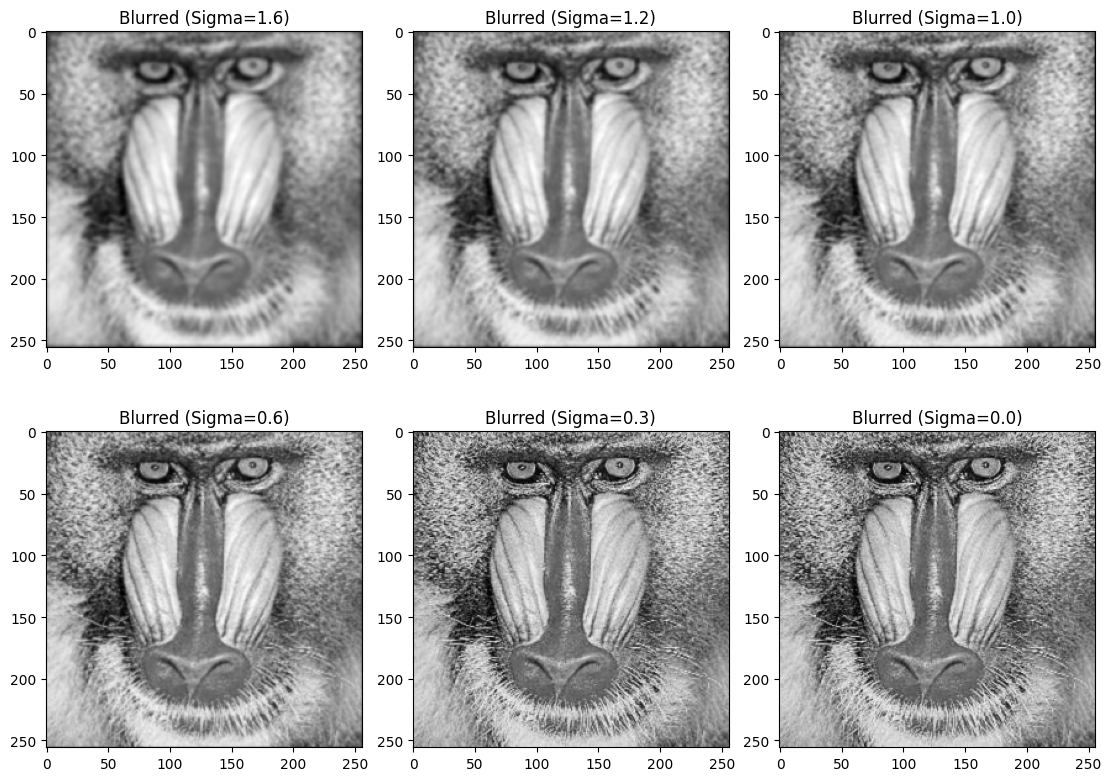

In [13]:
sigma_values = [1.6, 1.2, 1.0, 0.6, 0.3 ,0.0]

# Create subplots
fig, axs = plt.subplots(2, 3, figsize=(11, 8), constrained_layout=True)

# Flatten the 3x2 subplot array for easy iteration
axs = axs.flatten()

# Loop through sigma values and display blurred images
for i, sigma in enumerate(sigma_values):
    
 result = gaussian_blur(sigma, image)
 axs[i].imshow(result, 'gray')
 axs[i].set_title(f"Blurred (Sigma={sigma})")



# Show the plot
plt.show()